In [1]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import sys
import os

sys.path.append("C:\\Users\\vbert\\OneDrive\\DOUTORADO Poly Mtl\\Projeto\\parser-1\\Parser")

path = os.path.join(os.getcwd(), "vectors\HDFS_2k.log_vectors.vec")

vectors = pickle.load(open(path, 'rb'))

c:\Users\vbert\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\vbert\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


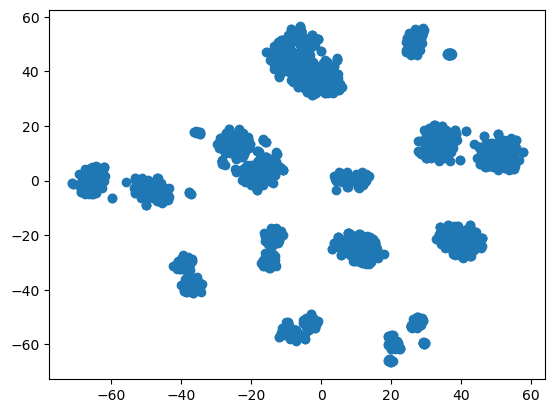

In [2]:
projection = TSNE().fit_transform(vectors)
plt.scatter(projection[:,0], projection[:,1])
plt.savefig("raw_hdfs.jpg", dpi=1200)

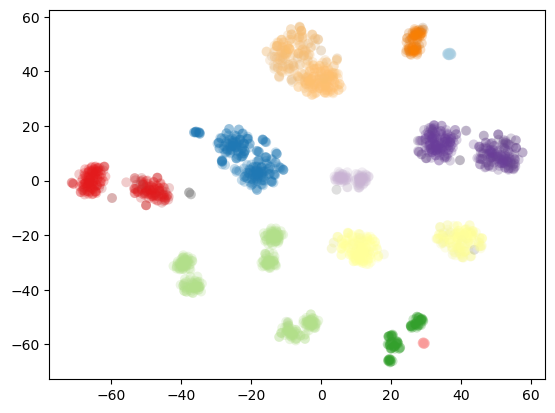

In [3]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(vectors)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.savefig("clustered_hdfs.jpg", dpi=1200)